<a href="https://colab.research.google.com/github/harshvarma-27/Digit_classification_mnist_dataset/blob/main/Mnist_Digit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [3]:
# Load the MNIST dataset from Keras
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)


Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


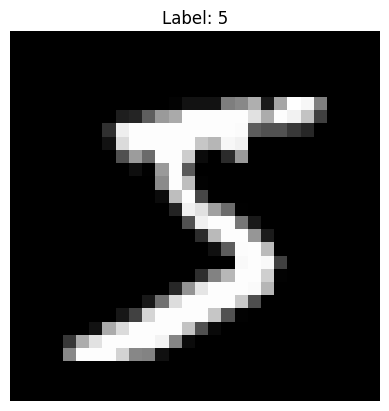

In [5]:
plt.imshow(x_train[0], cmap='gray')   # show image in grayscale
plt.title(f"Label: {y_train[0]}")
plt.axis('off')
plt.show()


In [6]:
# Flatten 28x28 images to 1D arrays of 784 elements
x_train = x_train.reshape((x_train.shape[0], 28 * 28))
x_test = x_test.reshape((x_test.shape[0], 28 * 28))


In [7]:
# Flatten 28x28 images to 1D arrays of 784 elements
x_train = x_train.reshape((x_train.shape[0], 28 * 28))
x_test = x_test.reshape((x_test.shape[0], 28 * 28))


In [8]:
print("New shape of x_train:", x_train.shape)
print("New shape of x_test:", x_test.shape)


New shape of x_train: (60000, 784)
New shape of x_test: (10000, 784)


In [9]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),  # Hidden layer
    layers.Dense(64, activation='relu'),                       # Another hidden layer
    layers.Dense(10, activation='softmax')                     # Output layer
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [12]:
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7645 - loss: 5.5746 - val_accuracy: 0.8785 - val_loss: 0.4367
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8995 - loss: 0.3829 - val_accuracy: 0.9295 - val_loss: 0.2486
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9324 - loss: 0.2428 - val_accuracy: 0.9465 - val_loss: 0.1984
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9471 - loss: 0.1930 - val_accuracy: 0.9575 - val_loss: 0.1525
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9559 - loss: 0.1577 - val_accuracy: 0.9593 - val_loss: 0.1469


In [13]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9483 - loss: 0.1889

Test Accuracy: 0.9514


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


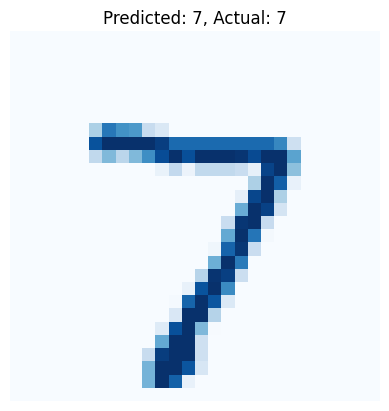

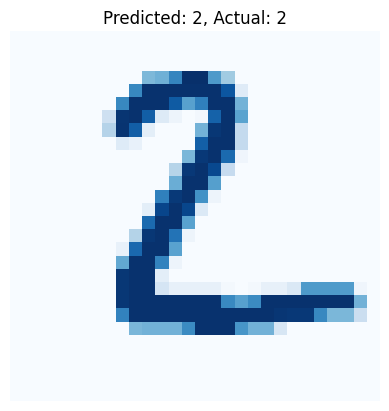

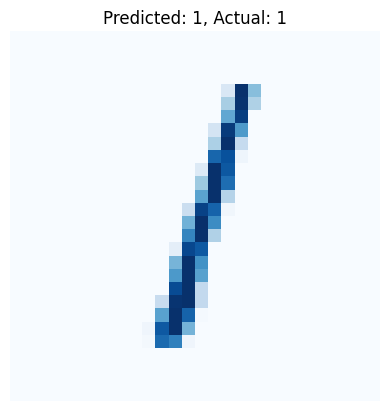

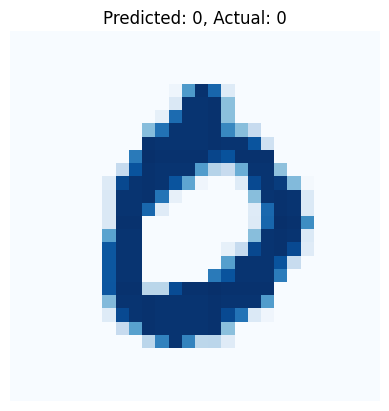

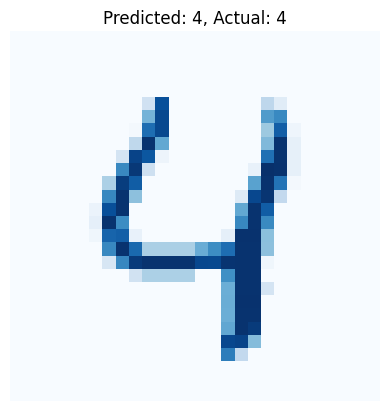

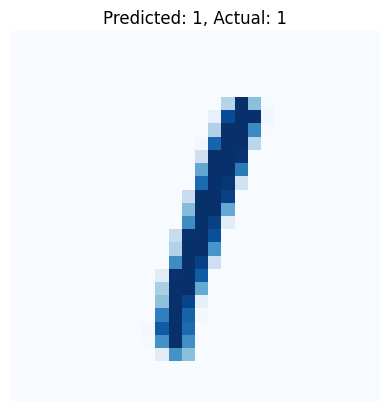

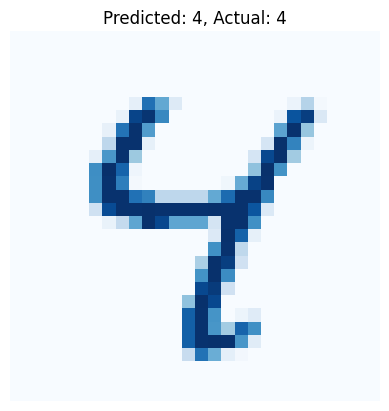

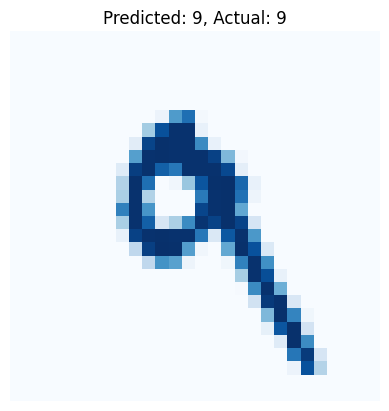

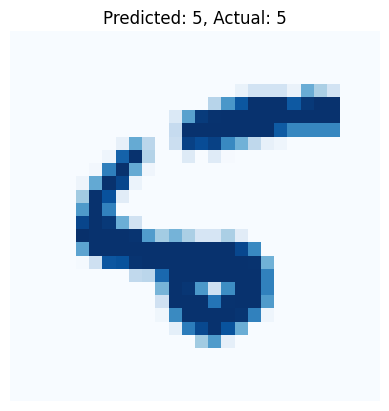

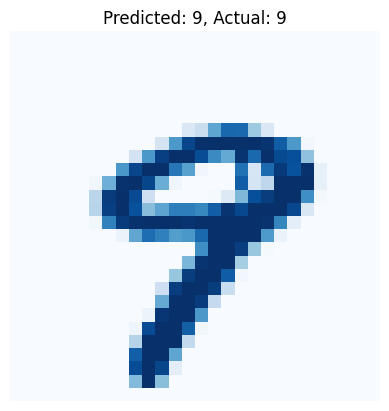

In [14]:
import numpy as np

# Predict probabilities for test images
predictions = model.predict(x_test)

# Get the predicted labels (highest probability index)
predicted_labels = np.argmax(predictions, axis=1)

# Show 5 test images with predicted and true labels
for i in range(10):
    plt.imshow(x_test[i].reshape(28, 28), cmap='Blues')
    plt.title(f"Predicted: {predicted_labels[i]}, Actual: {y_test[i]}")
    plt.axis('off')
    plt.show()
